In [1]:
from transformers import pipeline

fill_mask_secbert = pipeline(
    "fill-mask",
    model="jackaduma/SecBERT",
    tokenizer="jackaduma/SecBERT"
)

fill_mask_secroberta = pipeline(
    "fill-mask",
    model="jackaduma/SecRoBERTa",
    tokenizer="jackaduma/SecRoBERTa"
)


In [45]:
s4 = 'The <mask> shall provide a field which will identify patients as being exempt from reporting functions.'  # system
s = s4

print("\n\n"+"Eval the followed sentence: ")
print(s)

print("\n" + "#"*20 + " "*10 + "Our SecBERT")
result = fill_mask_secbert(s.replace("<mask>", "[MASK]"))

for res in result:
    print(res)
    print(res['score'])
    print("-----")

print("\n" + "#"*20 + " "*10 + "Our SecRoBERTa")
result = fill_mask_secroberta(s)
for res in result:
    print(res)
    print(res['score'])
    print("-----")



Eval the followed sentence: 
The <mask> shall provide a field which will identify patients as being exempt from reporting functions.

####################          Our SecBERT
{'score': 0.7954744100570679, 'token': 1872, 'token_str': 'process', 'sequence': 'the process shall provide a field which will identify patients as being exempt from reporting functions.'}
0.7954744100570679
-----
{'score': 0.11438778042793274, 'token': 3256, 'token_str': 'center', 'sequence': 'the center shall provide a field which will identify patients as being exempt from reporting functions.'}
0.11438778042793274
-----
{'score': 0.021483605727553368, 'token': 2664, 'token_str': 'section', 'sequence': 'the section shall provide a field which will identify patients as being exempt from reporting functions.'}
0.021483605727553368
-----
{'score': 0.011605020612478256, 'token': 3876, 'token_str': 'store', 'sequence': 'the store shall provide a field which will identify patients as being exempt from reporting fu

In [3]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer_secbert = AutoTokenizer.from_pretrained("jackaduma/SecBERT")

secbert = AutoModelForMaskedLM.from_pretrained("jackaduma/SecBERT")


tokenizer_secroberta = AutoTokenizer.from_pretrained("jackaduma/SecRoBERTa")

secroberta = AutoModelForMaskedLM.from_pretrained("jackaduma/SecRoBERTa")


In [44]:
inputs = tokenizer_secbert("[MASK] we te me test we te metest we te metest we te metest we te metest we te metest we te metest we te metest we te metest we te metest we te metest we te me",  return_tensors="pt")
outputs = secbert(**inputs)
outputs

MaskedLMOutput(loss=None, logits=tensor([[[-0.2658, -1.9600, -6.2682,  ..., -1.9062, -3.1179, -4.6280],
         [-4.9635,  0.8959, -8.2744,  ..., -6.3458, -3.6850, -5.4991],
         [-6.0622, -6.1649, -8.1647,  ..., -3.3620, -4.4524, -4.3441],
         ...,
         [-5.3866,  1.0180, -5.3469,  ..., -5.9046, -1.4138, -0.2408],
         [-4.9967,  2.6980, -4.2786,  ..., -5.8461, -3.9313, -3.9515],
         [-3.0511, -3.2611, -7.1718,  ..., -1.5549, -2.0702,  1.6227]]],
       grad_fn=<AddBackward0>), hidden_states=None, attentions=None)

In [5]:
sequence_output = secbert(**inputs, output_hidden_states=True)
print(sequence_output)
print(len(sequence_output))
print(len(sequence_output[0]))
print(len(sequence_output[1][0]))
sequence_output[1][0].data

MaskedLMOutput(loss=None, logits=tensor([[[-0.2658, -1.9600, -6.2682,  ..., -1.9062, -3.1179, -4.6280],
         [-4.9635,  0.8959, -8.2744,  ..., -6.3458, -3.6850, -5.4991],
         [-6.0622, -6.1649, -8.1647,  ..., -3.3620, -4.4524, -4.3441],
         ...,
         [-5.3866,  1.0180, -5.3469,  ..., -5.9046, -1.4138, -0.2408],
         [-4.9967,  2.6980, -4.2786,  ..., -5.8461, -3.9313, -3.9515],
         [-3.0511, -3.2611, -7.1718,  ..., -1.5549, -2.0702,  1.6227]]],
       grad_fn=<AddBackward0>), hidden_states=(tensor([[[-0.5693, -0.4622, -0.4544,  ..., -0.1388, -0.4500,  0.0039],
         [-0.5855,  0.8601, -0.0534,  ...,  0.2578,  0.1678, -0.8228],
         [ 0.4114,  1.6218, -1.2251,  ...,  0.7614,  0.4032,  1.0271],
         ...,
         [-1.0410,  0.0333, -2.3539,  ...,  1.3691, -0.5247,  0.7782],
         [ 0.3109, -0.7104,  0.0713,  ...,  0.0987, -0.6510, -0.6115],
         [ 1.3198,  0.3911,  0.7538,  ...,  1.9921,  0.2873, -0.0400]]],
       grad_fn=<NativeLayerNormBackw

tensor([[[-0.5693, -0.4622, -0.4544,  ..., -0.1388, -0.4500,  0.0039],
         [-0.5855,  0.8601, -0.0534,  ...,  0.2578,  0.1678, -0.8228],
         [ 0.4114,  1.6218, -1.2251,  ...,  0.7614,  0.4032,  1.0271],
         ...,
         [-1.0410,  0.0333, -2.3539,  ...,  1.3691, -0.5247,  0.7782],
         [ 0.3109, -0.7104,  0.0713,  ...,  0.0987, -0.6510, -0.6115],
         [ 1.3198,  0.3911,  0.7538,  ...,  1.9921,  0.2873, -0.0400]]])

In [6]:
sequence_output = secbert(**inputs, output_hidden_states=True)
print(sequence_output)

MaskedLMOutput(loss=None, logits=tensor([[[-0.2658, -1.9600, -6.2682,  ..., -1.9062, -3.1179, -4.6280],
         [-4.9635,  0.8959, -8.2744,  ..., -6.3458, -3.6850, -5.4991],
         [-6.0622, -6.1649, -8.1647,  ..., -3.3620, -4.4524, -4.3441],
         ...,
         [-5.3866,  1.0180, -5.3469,  ..., -5.9046, -1.4138, -0.2408],
         [-4.9967,  2.6980, -4.2786,  ..., -5.8461, -3.9313, -3.9515],
         [-3.0511, -3.2611, -7.1718,  ..., -1.5549, -2.0702,  1.6227]]],
       grad_fn=<AddBackward0>), hidden_states=(tensor([[[-0.5693, -0.4622, -0.4544,  ..., -0.1388, -0.4500,  0.0039],
         [-0.5855,  0.8601, -0.0534,  ...,  0.2578,  0.1678, -0.8228],
         [ 0.4114,  1.6218, -1.2251,  ...,  0.7614,  0.4032,  1.0271],
         ...,
         [-1.0410,  0.0333, -2.3539,  ...,  1.3691, -0.5247,  0.7782],
         [ 0.3109, -0.7104,  0.0713,  ...,  0.0987, -0.6510, -0.6115],
         [ 1.3198,  0.3911,  0.7538,  ...,  1.9921,  0.2873, -0.0400]]],
       grad_fn=<NativeLayerNormBackw

In [7]:
for name, param in secbert.named_parameters():
    print('name: ', name)
    print(type(param))
    print('param.shape: ', param.shape)
    print('param.requires_grad: ', param.requires_grad)
    print('=====')

name:  bert.embeddings.word_embeddings.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([52000, 768])
param.requires_grad:  True
=====
name:  bert.embeddings.position_embeddings.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([514, 768])
param.requires_grad:  True
=====
name:  bert.embeddings.token_type_embeddings.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([1, 768])
param.requires_grad:  True
=====
name:  bert.embeddings.LayerNorm.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([768])
param.requires_grad:  True
=====
name:  bert.embeddings.LayerNorm.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([768])
param.requires_grad:  True
=====
name:  bert.encoder.layer.0.attention.self.query.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([768, 768])
param.requires_grad:  True
=====
name:  bert.encoder.layer.0.attention.self.query.bias
<class 'torch.nn.par

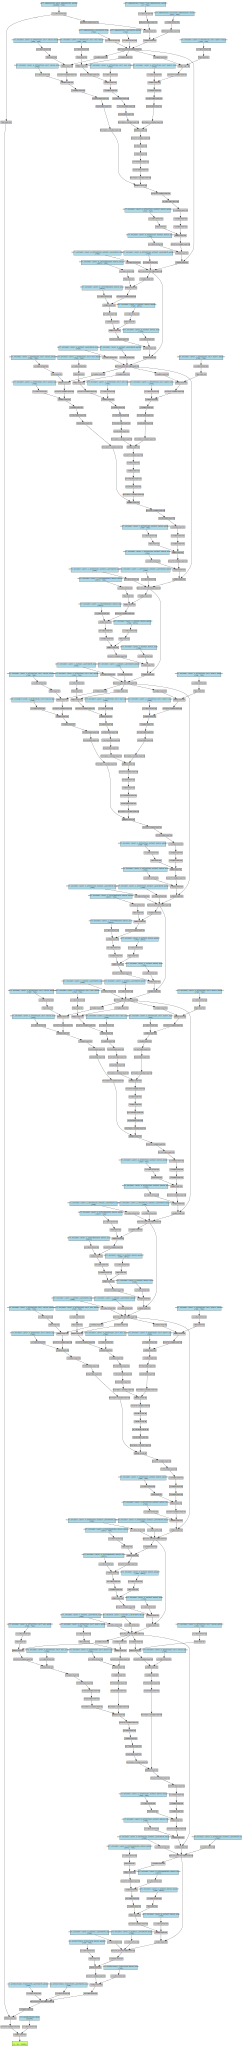

In [20]:
from torchviz import make_dot
make_dot(outputs[0], params=dict(secbert.named_parameters()))

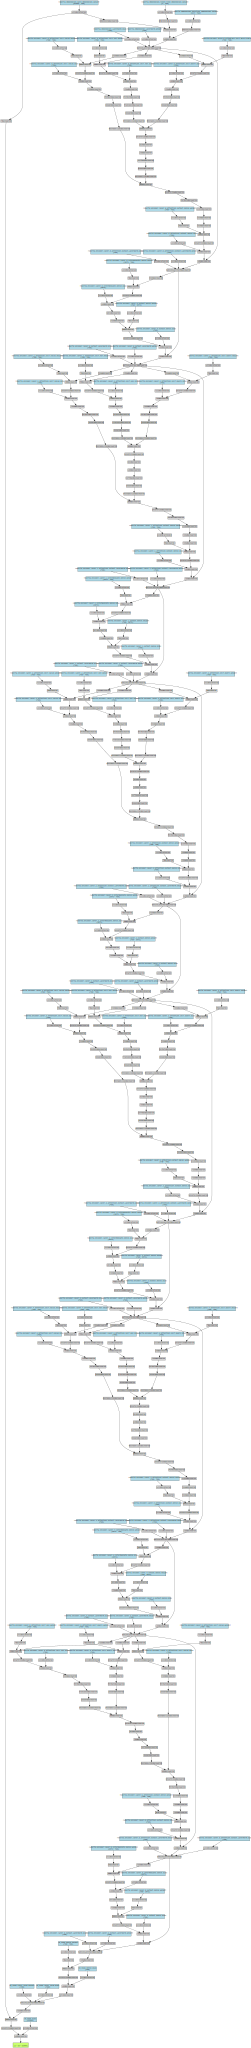

In [21]:
inputs = tokenizer_secroberta("[MASK] we te me test we te metest we te metest we te metest we te metest we te metest we te metest we te metest we te metest we te metest we te metest we te me",  return_tensors="pt")
outputs = secroberta(**inputs)
make_dot(outputs[0], params=dict(secroberta.named_parameters()))
